# 3 Clustering


Clustering is a machine learning method that groups a collection of objects into clusters, with each cluster containing objects that are highly similar to each other and distinct from those in other clusters. 


## 3.1 Gaussian Mixture Model (GMM) 

[A Gaussian Mixture Model (GMM)](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) is a probabilistic model that assumes that the data is generated from a mixture of several Gaussian distributions with unknown parameters. The equation for a GMM is a weighted sum of multiple Gaussian (Normal) distributions. 
The model is defined as:

$p(x) = \sum_{i=1}^{K} w_i \mathcal{N}({x}|\mu_i, \sigma_i)$

- $ p(x)$ overall probability
- $ {x} $ is the data point.
- $ K $ is the totla number of Gaussians (a notmal dictibution as a cluster).
- $ w_i $ are the weights (size) of the $i$th  Gaussian (summing to 1).
- $ \mathcal{N}({x}|\mu_i, \sigma_i) $ is the probability of the $i$th Gaussian.
- $\mu_i$ is the mean of the $i$th Gaussian.
- $\sigma_i$ is the variance of the $i$th Gaussian.
 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

__You can download the sample data from [here](https://hullacuk-my.sharepoint.com/:x:/g/personal/tongxin_chen_hull_ac_uk/EX-R87tgUxlCupINUCh4dgYBAB-1TH765Eh0ujdkIO89NQ?e=bnYbMe).__

In [9]:
# Read the data
df = pd.read_csv('cluster_data.csv')

In [10]:
df

Feature1   Feature2
0     4.862775   1.011907
1     5.743938   0.472795
2    10.177229  -1.014992
3    -0.405046   1.447232
4     1.260348   9.982292
..         ...        ...
495   9.447088  10.323605
496   5.335410   0.273029
497   5.668767   2.307601
498   8.489488  10.133309
499   6.282093  -0.258828

[500 rows x 2 columns]

__This noteboook use [seaborn](https://seaborn.pydata.org/index.html) (a Python data visualization library based on matplotlib) to visulise the clustering data.__

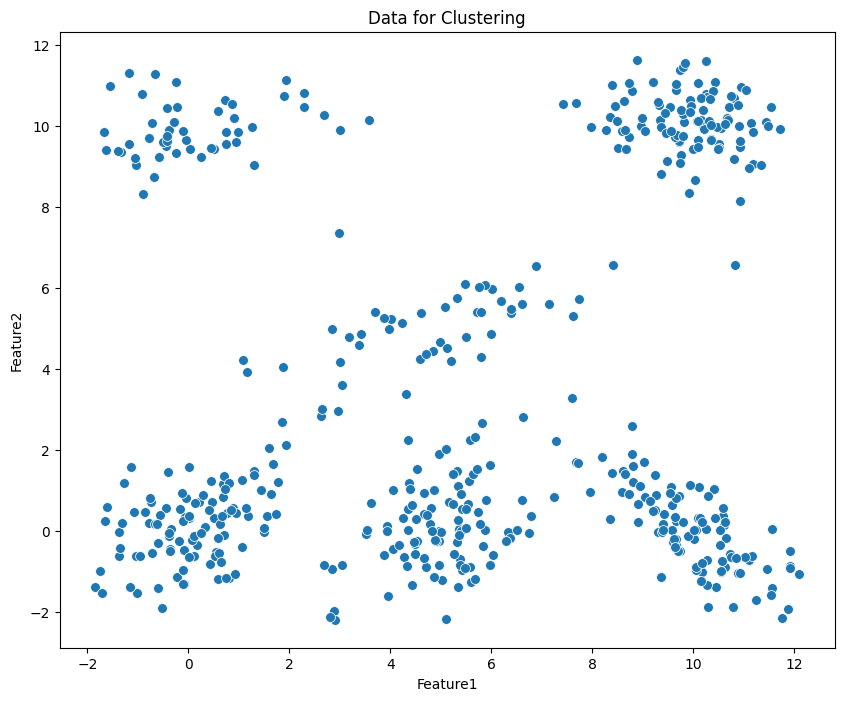

In [13]:
# Plot the data using seaborn
import seaborn as sns
plt.figure(figsize=(10, 8))
g = sns.scatterplot(data=df, x='Feature1', y='Feature2', s=50)
g.set_title('Data for Clustering')
plt.show()

In [333]:
from sklearn.mixture import GaussianMixture
# Define the parameters for GMM
gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=50) 
# GMM fitting
gmm.fit(df[['Feature1', 'Feature2']]) 
# Get labels from clusters
gmm_labels = gmm.predict(df[['Feature1', 'Feature2']])

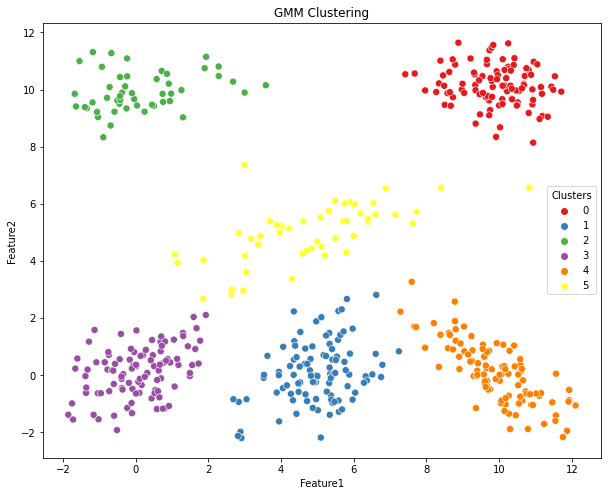

In [334]:
# Assign the labels of clusters to df
df['gmm_labels']=gmm_labels

# Plot the data with clusters
plt.figure(figsize=(10, 8))
g = sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='gmm_labels', palette='Set1', s=50, legend=True)
g.set_title('GMM Clustering')
g.legend(title='Clusters', loc='center right')
plt.show()

## 3.2 KMeans

[KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans) is a clustering method that divides data into K separate clusters, ensuring each data point is assigned to the cluster whose mean (centroid) is closest, determined by its features.

In [331]:
from sklearn.cluster import KMeans
# Define the parameters for KMeans
kmeans = KMeans(n_clusters=6, random_state=50)
# KMeans fitting
kmeans.fit(df[['Feature1', 'Feature2']])
# Generating labels
kmeans_labels = kmeans.predict(df[['Feature1', 'Feature2']])

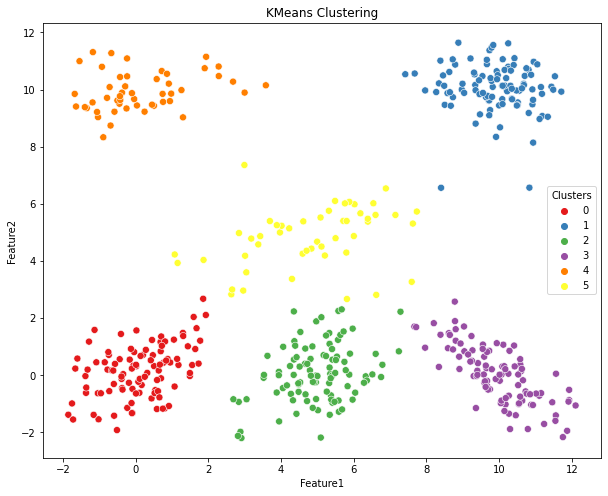

In [332]:
# Assign the labels of clusters to df
df['kmeans_labels'] = kmeans_labels

# Plot the data with clusters
plt.figure(figsize=(10, 8))
g = sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='kmeans_labels', palette='Set1', s=50, legend=True)
g.set_title('KMeans Clustering')
g.legend(title='Clusters', loc='center right')
plt.show()

## 3.3 DBSCAN

[Density-based spatial clustering of applications with noise](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) is a popular density-based clustering algorithm. Unlike partition-based methods like KMeans, DBSCAN is capable of finding clusters of arbitrary shapes and handling noise in the data.

Key Parameters: 

- eps (epsilon): The maximum distance between two points for one to be considered as in the neighborhood of the other.
- min_samples: The number of points(pts) in a neighborhood for a pt to be considered as a core pt (This includes the pt itself). 

In [186]:
from sklearn.cluster import DBSCAN
# Define the parameters for DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
# DBSACn implementing
dbscan.fit(df[['Feature1', 'Feature2']])

DBSCAN(eps=0.6)

In [191]:
# Generating the labels
df['dbscan_labels'] = dbscan.labels_
print('The numbers of clusters from DBSCAN:', df['dbscan_labels'].nunique()-1)

# We replace -1 to Noise
df.dbscan_labels = df.dbscan_labels.replace({-1:'Noise'})

The numbers of clusters from DBSCAN: 8


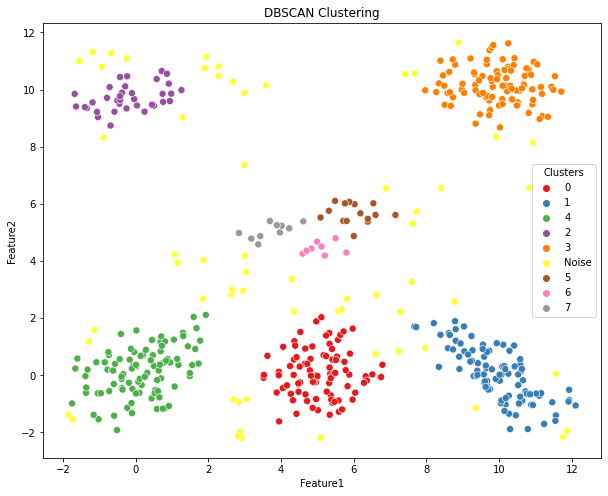

In [192]:
# Plot the data with clusters
plt.figure(figsize=(10, 8))
g = sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='dbscan_labels', palette='Set1', s=50, legend=True)
g.set_title('DBSCAN Clustering')
g.legend(title='Clusters', loc='center right')
plt.show()

## 3.4 Metric for clustering

Metrics  assess the effectiveness of clustering outcomes. 
By evaluating various clustering algorithms to select the optimal one or adjusting parameters within the same algorithm for tuning purposes (e.g., selecting the numbers of clusters), we can determine which configuration produces clusters that __aligned with our domain knowledge__.

Related metricis for clustering in sklearn can be found [here](https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics.cluster)

### 3.4.1 Silhouette coefficient

The [Silhouette Coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) is a metric used to evaluate the quality of clustering in unsupervised learning. It measures how similar each data point is to its own cluster compared to other clusters. 

$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$

- $s(i)$ represents the Silhouette Coefficient for data point $i$.
- $b(i)$ is the average distance from to all other points within the same cluster (intra-cluster distance).
- $a(i)$ is the minimum average distance from i to points in any other cluster (inter-cluster distance).
- $max(a(i),b(i))$ ensures $s(i)$ that is normalized to range between -1 and +1.



Interpretation:

- $s(i)$ near +1 indicates that point $i$ is well-clustered, with its distance to points in its own cluster significantly smaller than its distance to points in neighboring clusters.
- $s(i)$ near 0 indicates that point $i$ is on or very close to the decision boundary between two neighboring clusters. 
- $s(i)$ near -1 indicates that point $i$ may have been assigned to the wrong cluster.


In [200]:
from sklearn.metrics import silhouette_score

# This fucntion return the mean Silhouette Coefficient of all samples.
# We caculate the gmm clusters for an example
silhouette_avg = silhouette_score(df[['Feature1', 'Feature2']], df['gmm_labels']) 
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.6583554245759751


### 3.4.2 Davies-Bouldin Index

The [Davies-Bouldin Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html) provides a measure of the average similarity between each cluster.


$ DB = \frac{1}{n} \sum_{i=1}^{n} \max_{j \neq i} \left( \frac{S_i + S_j}{d(c_i, c_j)} \right) $

- $n$ is the number of clusters.
- $S_i$ is the average distance between each point in cluster $i$ and the centroid $c_i$.
- $d(c_i, c_j)$ is the distance between centroids $c_i$ and $c_j$.
- $\max_{j \neq i} \left( \frac{S_i + S_j}{d(c_i, c_j)} \right)$ computes the maximum similarity measure (Euclidean distance) between cluster $i$ and any other cluster $j$.

Interpretation:

- Lower values of DB indicate better-defined and well-separated clusters.
 

In [204]:
from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin Index
# We caculate the gmm clusters for an example
db_index = davies_bouldin_score(df[['Feature1', 'Feature2']], df['gmm_labels'])
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.5099268217594325


### 3.4.3 Parameter tuning using clustering metrics

__Example: GMM with Silhouette Scores and DB index__

In [209]:

# Define the range for the number of clusters
cluster_range = range(2, 11)

# Initialize lists to store metric scores
silhouette_scores = []
davies_bouldin_scores = []

for n_clusters in cluster_range:
    # Fit GMM model using differetn cluster numbers
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(df[['Feature1', 'Feature2']])
    
    # Generating labels
    labels = gmm.predict(df[['Feature1', 'Feature2']])
    
    # Caculate Silhouette Coefficient
    silhouette_avg = silhouette_score(df[['Feature1', 'Feature2']], labels)
    silhouette_scores.append(silhouette_avg)
    
    # Caculate Davies-Bouldin Index
    db_index = davies_bouldin_score(df[['Feature1', 'Feature2']], labels)
    davies_bouldin_scores.append(db_index)
    
    print(f'Number of clusters: {n_clusters}')
    print(f'Silhouette Coefficient: {silhouette_avg}')
    print(f'Davies-Bouldin Index: {db_index}\n')

Number of clusters: 2
Silhouette Coefficient: 0.4759573267675314
Davies-Bouldin Index: 0.9428541532461406

Number of clusters: 3
Silhouette Coefficient: 0.4498804005051643
Davies-Bouldin Index: 0.8947941640661562

Number of clusters: 4
Silhouette Coefficient: 0.5532583288266844
Davies-Bouldin Index: 0.6998984841936211

Number of clusters: 5
Silhouette Coefficient: 0.6167432592503067
Davies-Bouldin Index: 0.5778207829980669

Number of clusters: 6
Silhouette Coefficient: 0.6583554245759751
Davies-Bouldin Index: 0.5099268217594325

Number of clusters: 7
Silhouette Coefficient: 0.5736732293848706
Davies-Bouldin Index: 0.6364794951052388

Number of clusters: 8
Silhouette Coefficient: 0.5539383347785078
Davies-Bouldin Index: 0.6813828819054302

Number of clusters: 9
Silhouette Coefficient: 0.4711712615365365
Davies-Bouldin Index: 0.7746958603760038

Number of clusters: 10
Silhouette Coefficient: 0.4227693058025749
Davies-Bouldin Index: 0.7967121287843237



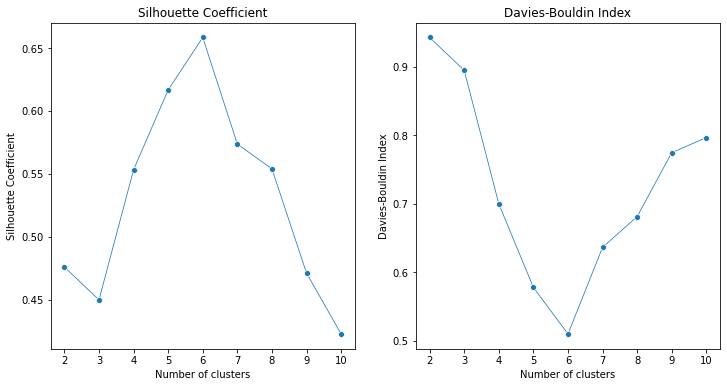

In [222]:
# Plotting the metrics iwht cluster numbers
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.lineplot(x=cluster_range, y=silhouette_scores, marker='o', size=20, ax=ax[0], legend=False)
ax[0].set_title('Silhouette Coefficient')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Silhouette Coefficient')

sns.lineplot(x=cluster_range, y=davies_bouldin_scores, marker='o', size=20 ,ax=ax[1], legend=False)
ax[1].set_title('Davies-Bouldin Index')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Davies-Bouldin Index')
plt.show()

In summary, we can identify the optimal cluster number (6) in this clustering task where the Silhouette Coefficient is highest and the Davies-Bouldin Index is lowest.

## 3.5 Clustering for road accident data

In [3]:
# Connect the db and read the table 
import sqlite3
conn = sqlite3.connect('accident_data_v1.0.0_2023.db')
df_ac = pd.read_sql("SELECT * FROM accident;", conn)

In [4]:
# Check the columns
df_ac.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [5]:
# Camden Town LSOA index
camden_lsoas = ['E01000936', 'E01000937', 'E01000964', 'E01000934', 'E01000935', 'E01000942', 'E01000932', 'E01000933', 
                'E01000930', 'E01000931', 'E01000938', 'E01000939', 'E01000943', 'E01000916', 'E01000917', 'E01000914', 
                'E01000915', 'E01000912', 'E01000913', 'E01000910', 'E01000911', 'E01000918', 'E01000919', 'E01000876', 
                'E01000877', 'E01000874', 'E01000875', 'E01000872', 'E01000873', 'E01000870', 'E01000871', 'E01000878', 
                'E01000879', 'E01000966', 'E01000940', 'E01000967', 'E01000965', 'E01000962', 'E01000963', 'E01000960', 
                'E01000961', 'E01000941', 'E01000968', 'E01000949', 'E01000969', 'E01000856', 'E01000857', 'E01000854', 
                'E01000855', 'E01000852', 'E01000853', 'E01000850', 'E01000851', 'E01000858', 'E01000859', 'E01000946', 
                'E01000947', 'E01000944', 'E01000890', 'E01000899', 'E01000945', 'E01000948', 'E01000926', 'E01000927', 
                'E01000924', 'E01000925', 'E01000922', 'E01000905', 'E01000923', 'E01000955', 'E01000920', 'E01000921', 
                'E01000928', 'E01000929', 'E01000950', 'E01000897', 'E01000896', 'E01000895', 'E01000894', 'E01000893', 
                'E01000892', 'E01000891', 'E01000898', 'E01000906', 'E01000907', 'E01000904', 'E01000902', 'E01000903', 
                'E01000900', 'E01000901', 'E01000908', 'E01000909', 'E01000866', 'E01000867', 'E01000951', 'E01000864', 
                'E01000865', 'E01000862', 'E01000863', 'E01000860', 'E01000861', 'E01000868', 'E01000869', 'E01000846', 
                'E01000847', 'E01000844', 'E01000845', 'E01000842', 'E01000843', 'E01000848', 'E01000849', 'E01000974', 
                'E01000972', 'E01000973', 'E01000970', 'E01000971', 'E01000956', 'E01000957', 'E01000954', 'E01000952', 
                'E01000953', 'E01000958', 'E01000959', 'E01000887', 'E01000886', 'E01000885', 'E01000884', 'E01000883', 
                'E01000882', 'E01000881', 'E01000880', 'E01000889', 'E01000888']

In [6]:
# Select the road accidents in Camden Town and 2018 for a case study
df_ac_camden = df_ac[df_ac.lsoa_of_accident_location.isin(camden_lsoas)]
df_ac_camden_2018 = df_ac_camden.query('accident_year == 2018')

__In spatial analysis, use projected coordinates, such as the UK National Grid, instead of GPS coordinates (latitude and longitude) in modelling!__

 
- Projected Coordinates: In a projected coordinate system (e.g., the UK National Grid), distances are measured in consistent units (e.g., meters).  This makes the process straightforward to compute distances and areas accurately and form the results understandable.

- GPS Coordinates: Latitude and longitude are in degrees, and the actual distance represented by one degree varies depending on the location on the Earth's surface. The Earth's curvature affects calculations, requiring more complex spherical trigonometry for accurate distance and area computations.

In [7]:
# Plot the data using projected coords
plt.figure(figsize=(8, 8))
g = sns.scatterplot(data=df_ac_camden_2018, x='location_easting_osgr', y='location_northing_osgr', s=15)
g.set_title('The distribution of road accidents in Camben (2018 year)')
plt.show()

NameError: name 'sns' is not defined

<Figure size 800x800 with 0 Axes>

__Selecting cluster numbers using Silhouette Coefficient and Davies-Bouldin Index in GMM__

Number of clusters: 6    Silhouette Coefficient: 0.37833352706242046   Davies-Bouldin Index: 0.959854198267482
Number of clusters: 7    Silhouette Coefficient: 0.3613672694848889   Davies-Bouldin Index: 0.950573717248856
Number of clusters: 8    Silhouette Coefficient: 0.3641638464614158   Davies-Bouldin Index: 0.9385426642771826
Number of clusters: 9    Silhouette Coefficient: 0.36832146527078075   Davies-Bouldin Index: 0.9154016121154555
Number of clusters: 10    Silhouette Coefficient: 0.3503549807998095   Davies-Bouldin Index: 1.010263464105789
Number of clusters: 11    Silhouette Coefficient: 0.38290098011497387   Davies-Bouldin Index: 0.8579194159105286
Number of clusters: 12    Silhouette Coefficient: 0.3891952064700905   Davies-Bouldin Index: 0.8141446777802225
Number of clusters: 13    Silhouette Coefficient: 0.3325180291459693   Davies-Bouldin Index: 0.8954799369224724
Number of clusters: 14    Silhouette Coefficient: 0.3090034371830531   Davies-Bouldin Index: 0.9587405872550

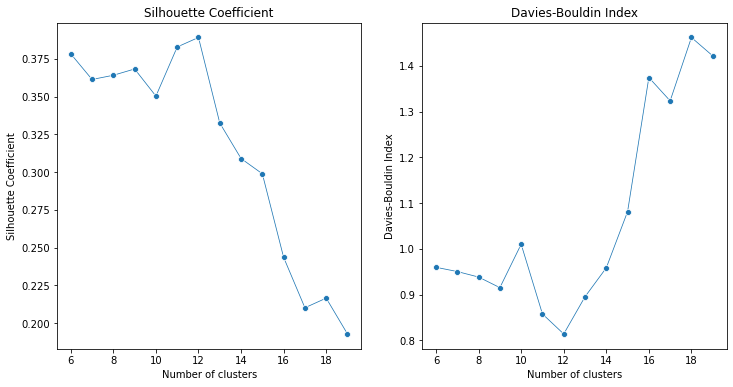

In [326]:
pd.options.mode.chained_assignment = None

# Select clustering df with the coords information
df_clustering = df_ac_camden_2018[['location_easting_osgr', 'location_northing_osgr']]

# Define the range for the number of clusters
cluster_range = range(6, 20)

# Create lists to store metric scores
silhouette_scores = []
davies_bouldin_scores = []

for n_clusters in cluster_range:
   
    # Fit GMM model using differetn cluster numbers
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(df_clustering[['location_easting_osgr', 'location_northing_osgr']])
    
    # Generating labels
    labels = gmm.predict(df_clustering[['location_easting_osgr', 'location_northing_osgr']])
    
    # Saving labels to clustering df
    df_clustering[f'labels_{n_clusters}'] = labels 

    # Caculate Silhouette Coefficient
    silhouette_avg = silhouette_score(df_clustering[['location_easting_osgr', 'location_northing_osgr']], labels)
    silhouette_scores.append(silhouette_avg)
    
    # Caculate Davies-Bouldin Index
    db_index = davies_bouldin_score(df_clustering[['location_easting_osgr', 'location_northing_osgr']], labels)
    davies_bouldin_scores.append(db_index)
    
    print(f'Number of clusters: {n_clusters}   ', f'Silhouette Coefficient: {silhouette_avg}  ', f'Davies-Bouldin Index: {db_index}')


# Plotting the metrics with cluster numbers
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.lineplot(x=cluster_range, y=silhouette_scores, marker='o', size=20, ax=ax[0], legend=False)
ax[0].set_title('Silhouette Coefficient')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Silhouette Coefficient')

sns.lineplot(x=cluster_range, y=davies_bouldin_scores, marker='o', size=20 ,ax=ax[1], legend=False)
ax[1].set_title('Davies-Bouldin Index')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Davies-Bouldin Index')
plt.show()


__We can get the optimal cluster number is 12 based on Silhouette Coefficient and DB index from our pre-definded cluster number range.__

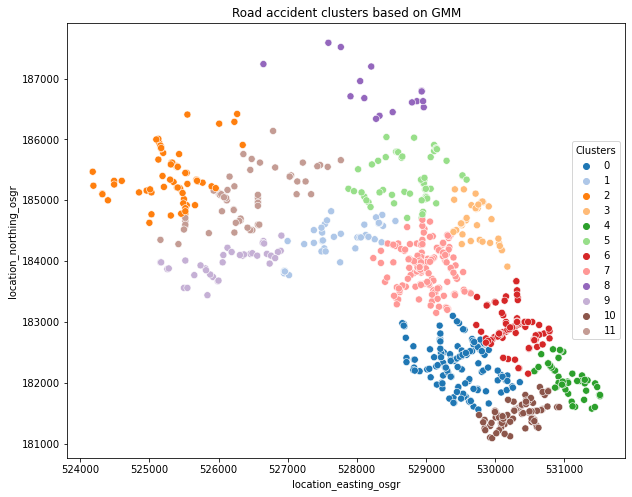

In [327]:
# Plot the data with clusters
plt.figure(figsize=(10, 8))
# Select the labels with cluster numbers is 12 as the optimal result in this analysis.
g = sns.scatterplot(data=df_clustering, x='location_easting_osgr', y='location_northing_osgr', hue='labels_12', palette='tab20', s=50, legend=True) 
g.set_title('Road accident clusters based on GMM')
g.legend(title='Clusters', loc='center right')
plt.show()

__Further discussion and considerations:__

1. Do you think the accident clusters generated in this analysis (12 big clusters in Camden Town) align with your expectations?
2. In other words, do you believe it is reasonable that all the accidents are assigned to 12 major clusters in Camden Town? Alternatively, can you provide insight into whether these clusters have significant implications for road safety policies?
3. Could you explain why these accidents were grouped into these clusters? Are weather conditions, road conditions, or driving behavior factors involved?  Further analysis should be implemented for a deeper explanation.
4. Consider using density-based clustering (DBSCAN) instead of partitioning clustering methods for another analysis. Could you use the DB index to help determine the optimal cluster numbers or eps? If not, please review the definition of this index and thinking why. 
5. Different research areas often have predefined parameters for clustering. Therefore, do the research for domain knowledge/background can help you understand your data science project.